In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [3]:
base = pd.read_csv('../../../Data/BaseData.csv')

In [4]:
Ridge = Ridge()

In [5]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [6]:
y

array([126000, 139500, 124900, ..., 145000, 217500, 215000])

In [7]:
ylog = np.log10(y)
ylog

array([5.10037055, 5.14457421, 5.09656244, ..., 5.161368  , 5.33745926,
       5.33243846])

In [10]:
10**ylog

array([126000., 139500., 124900., ..., 145000., 217500., 215000.])

In [11]:
len(y)

2580

In [12]:
X.shape

(2580, 298)

In [13]:
X.shape[1]

298

In [14]:
Scores = []
AdjR2 = []
MSE = []
RMSE = []
MAE = []

Scores_Log = []
AdjR2_Log = []
MSE_Log = []
RMSE_Log = []
MAE_Log = []
MAE_USD = []

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    Ridge.fit(X_train, y_train)
    pred = Ridge.predict(X_test)
    Score = r2_score(y_test, pred)
    Scores.append(Score)
    
    Adj_r2 = 1 - (1-r2_score(y_test, pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2.append(Adj_r2)
    
    mse = mean_squared_error(y_test, pred)
    MSE.append(mse)
    
    rmse = np.sqrt(mse)
    RMSE.append(rmse)
    
    mae = mean_absolute_error(y_test, pred)
    MAE.append(mae)
    
 #   plt.figure(figsize=(7,7))
 #   plt.scatter(pred, y_test, c='crimson')

 #   plt.title('Ridge')
 #   p1 = max(max(pred), max(y_test))
 #   p2 = min(min(pred), min(y_test))
 #   plt.plot([p1, p2], [p1, p2], 'b-')
 #   plt.xlabel('Predictions', fontsize=15)
 #   plt.ylabel('True Values', fontsize=15)
 #   plt.axis('equal')
 #   plt.annotate('Adjusted R2: ' + str(round(Adj_r2,2)), xy=(0.05, 0.95), xycoords='axes fraction')
 #   plt.annotate('RMSE: ' + str(round(rmse,2)), xy=(0.05, 0.90), xycoords='axes fraction')
 #   plt.annotate('MAE: ' + str(round(mae,2)), xy=(0.05, 0.85), xycoords='axes fraction')
 #   plt.show()
    
    
    y_train_log = np.log(y_train)
    y_test_log = np.log(y_test)
    
    Ridge.fit(X_train, y_train_log)
    pred_log = Ridge.predict(X_test)
    
    Score = r2_score(y_test_log, pred_log)
    Scores_Log.append(Score)
    
    Adj_r2 = 1 - (1-r2_score(y_test_log, pred_log)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2_Log.append(Adj_r2)
    
    mse = mean_squared_error(y_test_log, pred_log)
    MSE_Log.append(mse)
    
    rmse = np.sqrt(mse)
    RMSE_Log.append(rmse)
    
    mae = mean_absolute_error(y_test_log, pred_log)
    MAE_Log.append(mae)
    
    PredUSD = 10**pred_log
    maeUSD = mean_absolute_error(y_test, PredUSD)
    MAE_USD.append(maeUSD)
    
 #   plt.figure(figsize=(7,7))
 #   plt.scatter(pred_log, y_test_log, c='crimson')

#    plt.title('Ridge_Log')
#    p1 = max(max(pred_log), max(y_test_log))
#    p2 = min(min(pred_log), min(y_test_log))
#    plt.plot([p1, p2], [p1, p2], 'b-')
#    plt.xlabel('Predictions', fontsize=15)
#    plt.ylabel('True Values', fontsize=15)
#    plt.axis('equal')
#    plt.annotate('Adjusted R2: ' + str(round(Adj_r2,2)), xy=(0.05, 0.95), xycoords='axes fraction')
#    plt.annotate('RMSE: ' + str(round(rmse,2)), xy=(0.05, 0.90), xycoords='axes fraction')
#    plt.annotate('MAE: ' + str(round(mae,2)), xy=(0.05, 0.85), xycoords='axes fraction')
#    plt.show()
    
    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.04601e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.04601e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=8.11678e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=8.11678e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAl

In [15]:
pred_log

array([11.73358905, 12.2677864 , 12.11157203, 12.23739611, 12.00396476,
       12.41260962, 12.27761794, 11.57014145, 11.74967517, 11.82365659,
       12.53496628, 12.1283931 , 12.26123777, 11.77152779, 12.15107559,
       11.8658291 , 11.31376446, 11.93063506, 11.9394929 , 12.52014286,
       12.44560515, 12.14978815, 12.29666293, 12.26066381, 11.73602934,
       11.68901201, 12.19935769, 12.20280354, 12.54427765, 12.2958761 ,
       11.88687801, 12.34306879, 11.77095322, 12.27562463, 12.12896209,
       11.82152874, 11.64903171, 11.94509511, 11.98904004, 12.16329047,
       12.35340916, 12.23696179, 11.87021551, 11.97398526, 11.86786615,
       12.21062744, 12.13106146, 12.28299597, 12.30475564, 12.56361904,
       12.14188895, 11.67248067, 11.77412366, 11.86769038, 12.14311216,
       11.49717319, 11.13559298, 11.95625464, 12.14255089, 12.30098399,
       11.87164436, 12.87017362, 11.72270163, 11.85664532, 11.71066948,
       11.82562736, 11.34710581, 12.43849004, 12.82053704, 11.77

In [16]:
10**pred_log

array([5.41488265e+11, 1.85262022e+12, 1.29292112e+12, 1.72741269e+12,
       1.00917099e+12, 2.58588744e+12, 1.89503810e+12, 3.71656261e+11,
       5.61920874e+11, 6.66279708e+11, 3.42741178e+12, 1.34398090e+12,
       1.82489455e+12, 5.90918777e+11, 1.41604021e+12, 7.34224891e+11,
       2.05951265e+11, 8.52383553e+11, 8.69947211e+11, 3.31240062e+12,
       2.79000611e+12, 1.41184867e+12, 1.97998970e+12, 1.82248435e+12,
       5.44539445e+11, 4.88665868e+11, 1.58255089e+12, 1.59515740e+12,
       3.50168967e+12, 1.97640570e+12, 7.70686953e+11, 2.20327543e+12,
       5.90137506e+11, 1.88636022e+12, 1.34574287e+12, 6.63023219e+11,
       4.45688791e+11, 8.81241846e+11, 9.75079536e+11, 1.45643285e+12,
       2.25636401e+12, 1.72568605e+12, 7.41678188e+11, 9.41857628e+11,
       7.37676844e+11, 1.62415486e+12, 1.35226392e+12, 1.91865094e+12,
       2.01723105e+12, 3.66116279e+12, 1.38640128e+12, 4.70414465e+11,
       5.94461399e+11, 7.37378344e+11, 1.39031163e+12, 3.14176131e+11,
      

In [17]:
y_test

array([128900, 207000, 185000, 207000, 151400, 221300, 215000, 100000,
       133900, 138500, 300000, 168675, 223500, 128500, 185900, 143000,
        88000, 153575, 185000, 270000, 245000, 207500, 205000, 212300,
       129250, 130000, 201490, 200000, 272500, 214000, 173000, 234500,
       163000, 210000, 179600, 134450, 116500, 165500, 165500, 176500,
       217500, 217500, 149300, 167900, 155000, 203000, 187500, 213000,
       212700, 285000, 190550, 125000, 127500, 142250, 189500,  99900,
        50000, 146000, 197900, 235000, 172000, 475000,  97500, 137000,
       145000, 143000, 119600, 253000, 377426, 131000, 162500, 165000,
       116900, 120000, 105000, 123600, 180000, 271900, 127000, 372397,
       113000, 125000,  65000, 106000, 123000, 193000, 210000, 189000,
       123000, 126000,  82000, 151500, 162000, 210000, 282500, 113000,
       164000, 226000, 142500, 376162, 155000, 386250, 139500, 244000,
       132000, 141000, 165000, 120000, 213000, 140200, 111000, 213250,
      

In [18]:
mean_absolute_error(y_test, 10**pred_log)

1524272845921.957

In [16]:
combo = pd.DataFrame({'R_Squared': Scores, 'Adjusted_R2': AdjR2, 'Mean Squared Error': MSE,
                      'Root MSE': RMSE, 'Mean Absolute Error': MAE})

In [17]:
combo

,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error
0,0.933541,0.924858,4.182394e+08,20450.902276,13957.504284
1,0.921332,0.911054,4.026099e+08,20065.141041,13962.919226
2,0.916245,0.905303,4.920988e+08,22183.301138,14705.729095
3,0.868533,0.851357,7.122316e+08,26687.667869,14771.868444
4,0.858004,0.839454,7.323637e+08,27062.219544,14412.285787
5,0.915810,0.904811,3.889940e+08,19722.931669,13601.448072
6,0.920921,0.910589,4.271812e+08,20668.361091,14543.791970
7,0.874887,0.858541,6.848933e+08,26170.465850,14382.006454
8,0.896728,0.883237,5.285395e+08,22989.987619,14240.028987
9,0.909204,0.897342,4.585789e+08,21414.454884,15025.952071


In [18]:
combo_log = pd.DataFrame({'R_Squared_Log': Scores_Log, 'Adjusted_R2_Log': AdjR2_Log, 
                          'Mean Squared Error Log': MSE_Log,
                          'Root MSE Log': RMSE_Log, 'MAE Log': MAE_Log,
                          'MAE USD': MAE_USD})

In [19]:
combo_log

,R_Squared_Log,Adjusted_R2_Log,Mean Squared Error Log,Root MSE Log,MAE Log,MAE USD
0,0.924714,0.914878,0.012020,0.109635,0.068665,11454.380775
1,0.926877,0.917323,0.010200,0.100994,0.072092,12063.109972
2,0.902759,0.890055,0.014502,0.120422,0.076579,13069.515568
3,0.901354,0.888466,0.014884,0.121999,0.074634,13112.571489
4,0.898133,0.884824,0.013895,0.117876,0.072245,13431.567297
5,0.917648,0.906889,0.010741,0.103639,0.071353,12082.782623
6,0.897738,0.884378,0.016788,0.129567,0.078094,12760.129073
7,0.899752,0.886655,0.014452,0.120215,0.074220,13221.585456
8,0.891155,0.876935,0.016279,0.127590,0.075350,12430.229154
9,0.919438,0.908913,0.011113,0.105420,0.076771,13226.306537


In [20]:
box = pd.concat([combo['Adjusted_R2'], combo_log['Adjusted_R2_Log']], axis=1)
box

,Adjusted_R2,Adjusted_R2_Log
0,0.924858,0.914878
1,0.911054,0.917323
2,0.905303,0.890055
3,0.851357,0.888466
4,0.839454,0.884824
5,0.904811,0.906889
6,0.910589,0.884378
7,0.858541,0.886655
8,0.883237,0.876935
9,0.897342,0.908913


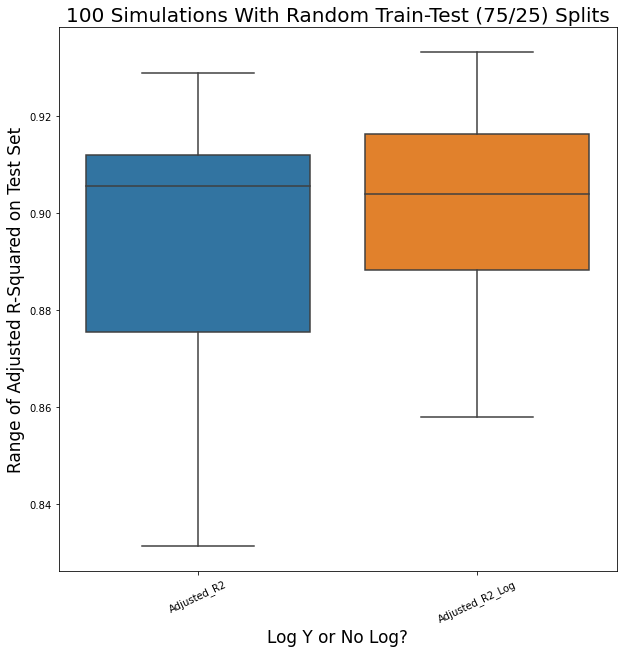

In [21]:
plt.figure(figsize=(10,10))
plt.title('100 Simulations With Random Train-Test (75/25) Splits', fontsize=20)
plt.ylabel('Range of Adjusted R-Squared on Test Set', fontsize=17)
plt.xlabel('Log Y or No Log?', fontsize=17)
sns.boxplot(data=box)
plt.xticks(rotation=25);

In [22]:
box.describe()

,Adjusted_R2,Adjusted_R2_Log
count,100.000000,100.000000
mean,0.894780,0.901141
std,0.025428,0.017279
min,0.831339,0.857962
25%,0.875448,0.888235
50%,0.905669,0.904009
75%,0.912028,0.916262
max,0.928904,0.933207


In [23]:
box2 = pd.concat([combo['Mean Absolute Error'], combo_log['MAE USD']], axis=1)
box2

,Mean Absolute Error,MAE USD
0,13957.504284,11454.380775
1,13962.919226,12063.109972
2,14705.729095,13069.515568
3,14771.868444,13112.571489
4,14412.285787,13431.567297
5,13601.448072,12082.782623
6,14543.791970,12760.129073
7,14382.006454,13221.585456
8,14240.028987,12430.229154
9,15025.952071,13226.306537


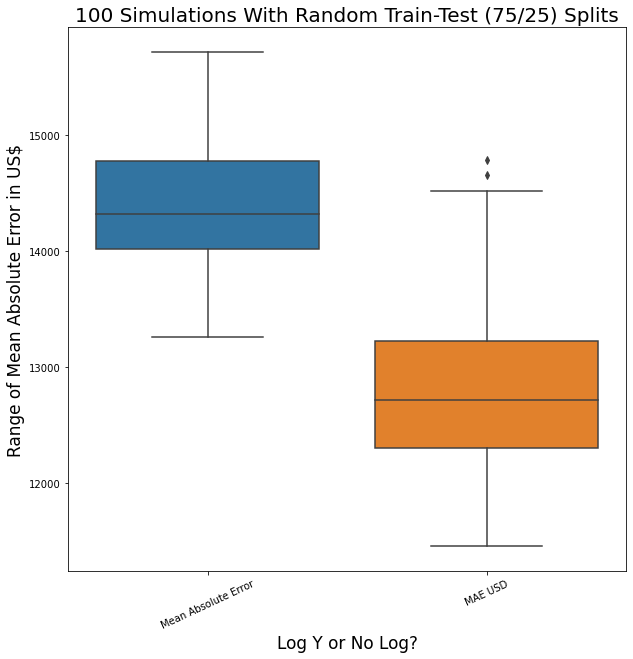

In [24]:
plt.figure(figsize=(10,10))
plt.title('100 Simulations With Random Train-Test (75/25) Splits', fontsize=20)
plt.ylabel('Range of Mean Absolute Error in US$', fontsize=17)
plt.xlabel('Log Y or No Log?', fontsize=17)
sns.boxplot(data=box2)
plt.xticks(rotation=25);

In [25]:
box2.describe()

,Mean Absolute Error,MAE USD
count,100.000000,100.000000
mean,14383.238924,12815.514869
std,552.386826,713.573453
min,13259.153659,11454.380775
25%,14018.223846,12298.564729
50%,14318.746933,12711.838611
75%,14772.635338,13222.786898
max,15711.525938,14778.744819
